<a href="https://colab.research.google.com/github/joelma78/GitPY/blob/main/dados_desbalanceados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dados desbalanceados

# Importação das bibliotecas básicas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

# Base de dados de crédito

- Fonte (adaptado): https://www.kaggle.com/laotse/credit-risk-dataset

## Correção de dados faltantes

In [ ]:
base_census = pd.read_csv("/content/census.csv")
base_census

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
base_census.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
base_census.isnull().sum()

,0
age,0
workclass,0
final-weight,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [ ]:
# vamos checar em todas as colunas categóricas do dataset
colunas_categoricas = ['workclass', 'education', 'marital-status', 'occupation',
                       'relationship', 'race', 'sex', 'native-country']

for coluna in colunas_categoricas:
  tem_interrogacao = base_census[coluna].str.contains("\?").any()
  if tem_interrogacao:
    print(f"Na coluna '{coluna}' existem valores '?'")

Na coluna 'workclass' existem valores '?'
Na coluna 'occupation' existem valores '?'
Na coluna 'native-country' existem valores '?'


In [ ]:
base_census["workclass"].str.contains("\?").sum()

np.int64(1836)

In [ ]:
base_census["occupation"].str.contains("\?").sum()

np.int64(1843)

In [ ]:
base_census["native-country"].str.contains("\?").sum()

np.int64(583)

In [ ]:
for coluna in colunas_categoricas:
  base_census[coluna] = base_census[coluna].replace(' ?', np.nan)

In [ ]:
base_census.isna().sum()

,0
age,0
workclass,1836
final-weight,0
education,0
education-num,0
marital-status,0
occupation,1843
relationship,0
race,0
sex,0


In [ ]:
base_census["workclass"].fillna(base_census["workclass"].mode().iloc[0], inplace = True)

/tmp/ipython-input-3711497848.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  base_census["workclass"].fillna(base_census["workclass"].mode().iloc[0], inplace = True)


In [ ]:
base_census["occupation"].fillna(base_census["occupation"].mode().iloc[0], inplace = True)

/tmp/ipython-input-3611334040.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  base_census["occupation"].fillna(base_census["occupation"].mode().iloc[0], inplace = True)


In [ ]:
base_census["native-country"].fillna(base_census["native-country"].mode().iloc[0], inplace = True)

/tmp/ipython-input-2194158697.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  base_census["native-country"].fillna(base_census["native-country"].mode().iloc[0], inplace = True)


In [ ]:
base_census.isna().sum()

,0
age,0
workclass,0
final-weight,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


## Visualização dos dados

In [ ]:
np.unique(base_census['income'], return_counts = True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

<Axes: xlabel='income', ylabel='count'>

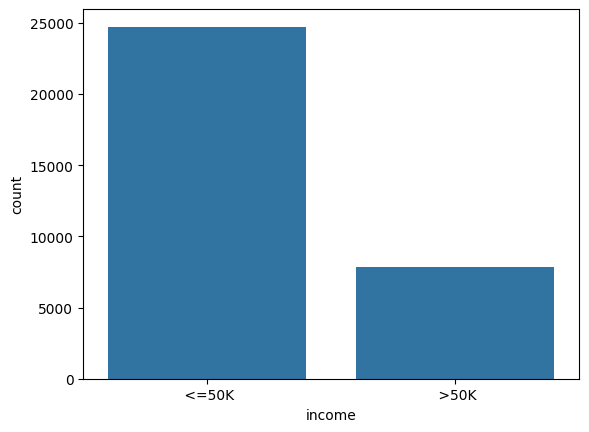

In [ ]:
sns.countplot(x = base_census['income'])

## Divisão entre previsores (X) e classe (y)

In [ ]:
X_census = base_census.iloc[:, 0:14].values
X_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [ ]:
y_census = base_census.iloc[:, 14].values
y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

## Tratamento de atributos categóricos

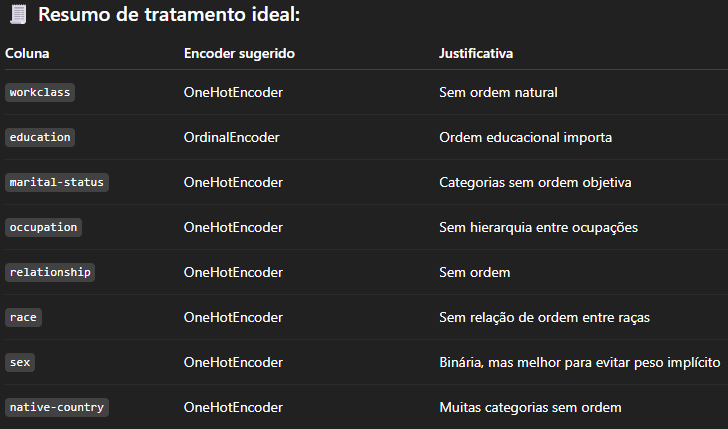

In [ ]:
################

In [ ]:
base_census['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [ ]:
# colocando ordem na coluna educantion
# 'Preschool' '1st-4th' '5th-6th' ' 7th-8th' '9th' '10th' '11th' '12th' 'HS-grad' 'Some-college'
# 'Assoc-voc' 'Assoc-acdm' 'Bachelors' 'Masters' 'Prof-school' 'Doctorate'

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
import pandas as pd


# Separar X e y (garanta que são DataFrames/Séries e use .copy())
X_census = base_census.iloc[:, 0:14].copy()
y_census = base_census.iloc[:, 14].copy()

# Identificar colunas categóricas e numéricas
categorical_cols = X_census.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = X_census.select_dtypes(exclude=["object"]).columns.tolist()

# Ordem personalizada da coluna 'education'
education_order = [
    'Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th',
    'HS-grad', 'Some-college', 'Assoc-voc', 'Assoc-acdm',
    'Bachelors', 'Masters', 'Prof-school', 'Doctorate'
]

# Remover espaços extras
X_census['education'] = X_census['education'].str.strip()

# Aplicar OrdinalEncoder na coluna 'education'
education_encoder = OrdinalEncoder(categories=[education_order])
X_census['education'] = education_encoder.fit_transform(X_census[['education']])

# Aplicar OneHotEncoder nas demais colunas categóricas
categorical_cols.remove('education')  # Remove 'education' da lista de colunas para OneHot
X_categorical = X_census[categorical_cols]

one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
X_encoded = one_hot_encoder.fit_transform(X_categorical)

# Obter nomes das colunas one-hot
encoded_col_names = one_hot_encoder.get_feature_names_out(categorical_cols)

# Montar DataFrames
X_numerical_df = X_census[numerical_cols + ['education']].reset_index(drop=True)
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_col_names)

# Concatenar resultados
X_census = pd.concat([X_numerical_df, X_encoded_df], axis=1)

# Resultado final: X_census está pronto para uso
X_census


,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week,education,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,12.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,50,83311,13,0,0,13,12.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,38,215646,9,0,0,40,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,53,234721,7,0,0,40,6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,28,338409,13,0,0,40,12.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,11.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32557,40,154374,9,0,0,40,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32558,58,151910,9,0,0,40,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32559,22,201490,9,0,0,20,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
##############

## Escalonamento dos valores

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_census = StandardScaler()
X_census = scaler_census.fit_transform(X_census)

In [ ]:
X_census

array([[ 0.03067056, -1.06361075,  1.13473876, ...,  0.30720846,
        -0.04540836, -0.02217266],
       [ 0.83710898, -1.008707  ,  1.13473876, ...,  0.30720846,
        -0.04540836, -0.02217266],
       [-0.04264203,  0.2450785 , -0.42005962, ...,  0.30720846,
        -0.04540836, -0.02217266],
       ...,
       [ 1.42360965, -0.35877741, -0.42005962, ...,  0.30720846,
        -0.04540836, -0.02217266],
       [-1.21564337,  0.11095988, -0.42005962, ...,  0.30720846,
        -0.04540836, -0.02217266],
       [ 0.98373415,  0.92989258, -0.42005962, ...,  0.30720846,
        -0.04540836, -0.02217266]])

##85.07% com os dados originais (RandomForestClassifier)

## Subamostragem com Tomek Links 88%

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.under_sampling import TomekLinks

In [ ]:
X_census.shape, y_census.shape # antes do Tomek

((32561, 90), (32561,))

In [ ]:
tl = TomekLinks(sampling_strategy='majority')
X_under, y_under = tl.fit_resample(X_census, y_census)

In [ ]:
X_under.shape, y_under.shape # tínhamos anteriormente 32561 registros. foram apagados 1.649 registros da classe <=50k (majority)

((30912, 90), (30912,))

In [ ]:
np.unique(y_census, return_counts=True) # antes do Tomek

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

In [ ]:
np.unique(y_under, return_counts=True) # após o Tomek

(array([' <=50K', ' >50K'], dtype=object), array([23071,  7841]))

In [ ]:
from sklearn.model_selection import train_test_split
X_census_treinamento_under, X_census_teste_under, y_census_treinamento_under, y_census_teste_under = train_test_split(X_under, y_under, test_size=0.15, random_state=0)
X_census_treinamento_under.shape, X_census_teste_under.shape

((26275, 90), (4637, 90))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest_census = RandomForestClassifier(criterion = 'entropy', min_samples_leaf =  1, min_samples_split = 5, n_estimators = 100) #número de árvores = 100
random_forest_census.fit(X_census_treinamento_under, y_census_treinamento_under)

RandomForestClassifier(criterion='entropy', min_samples_split=5)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
previsoes = random_forest_census.predict(X_census_teste_under)
accuracy_score(y_census_teste_under, previsoes)

0.8805262022859608

In [ ]:
print(classification_report(y_census_teste_under, previsoes))

              precision    recall  f1-score   support

       <=50K       0.91      0.94      0.92      3446
        >50K       0.80      0.72      0.76      1191

    accuracy                           0.88      4637
   macro avg       0.85      0.83      0.84      4637
weighted avg       0.88      0.88      0.88      4637



## Sobreamostragem com SMOTE 90%

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X_census.shape, y_census.shape # antes do SMOTE

((32561, 90), (32561,))

In [ ]:
smote = SMOTE(sampling_strategy='minority')
X_over, y_over = smote.fit_resample(X_census, y_census)

In [ ]:
X_over.shape, y_over.shape # tínhamos anteriormente 32561 registros. foram acrescentados 16.879 registros da classe >50k (minority)

((49440, 90), (49440,))

In [ ]:
np.unique(y_census, return_counts=True) # antes do SMOTE

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

In [ ]:
np.unique(y_over, return_counts=True) # depois do SMOTE

(array([' <=50K', ' >50K'], dtype=object), array([24720, 24720]))

In [ ]:
from sklearn.model_selection import train_test_split
X_census_treinamento_over, X_census_teste_over, y_census_treinamento_over, y_census_teste_over = train_test_split(X_over, y_over, test_size=0.15, random_state=0)
X_census_treinamento_over.shape, X_census_teste_over.shape

((42024, 90), (7416, 90))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest_census = RandomForestClassifier(criterion = 'entropy', min_samples_leaf =  1, min_samples_split = 5, n_estimators = 100)
random_forest_census.fit(X_census_treinamento_over, y_census_treinamento_over)

RandomForestClassifier(criterion='entropy', min_samples_split=5)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
previsoes = random_forest_census.predict(X_census_teste_over)
accuracy_score(y_census_teste_over, previsoes)

0.9035868392664509

In [ ]:
print(classification_report(y_census_teste_over, previsoes))

              precision    recall  f1-score   support

       <=50K       0.91      0.90      0.90      3722
        >50K       0.90      0.91      0.90      3694

    accuracy                           0.90      7416
   macro avg       0.90      0.90      0.90      7416
weighted avg       0.90      0.90      0.90      7416

